#Task - KNN from Scratch

Dataset - Click here to download the dataset: https://drive.google.com/file/d/1bWH5tVVpk-FC7YXJOsFkl8b4em6GHuUp/view

Data Description:
1. Title : Diamonds Dataset

2. the 7th column "price" is the values to be predicted.

3. Data Type : Mixed ( Numerical + Categorical)
	
4. Dataset has nearly 54000 instances.

5. It has 10 features.

6. Features 

	price : price in US dollars (\$326--\$18,823)

	carat : weight of the diamond (0.2--5.01)

	cut   : quality of the cut (Fair, Good, Very Good, Premium, Ideal)

	color : diamond colour, from J (worst) to D (best)

	clarity : a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

	x : length in mm (0--10.74)

	y : width in mm (0--58.9)

	z : depth in mm (0--31.8)

	depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

	table : width of top of diamond relative to widest point (43--95)

7. Caution : Handle Categorical data before building a model. 


**Task - Predict the diamond price.💎**

**Write the KNN code from scratch and make it work on the given dataset ?**


In [ ]:
#importing the requirements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

**Step - 1: Load the data**

In [ ]:
df = pd.read_csv('diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


**Step - 2: Perform the EDA on the given dataset**

In [ ]:
df.shape

(53940, 10)

In [ ]:
df.rename(columns={"x": "length", "y": "width", "z" : "depth","depth" : "depth %", "table": "table %"},inplace = True)

In [ ]:
df['L/W'] = df['length']/df['width']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth %  53940 non-null  float64
 5   table %  53940 non-null  float64
 6   price    53940 non-null  int64  
 7   length   53940 non-null  float64
 8   width    53940 non-null  float64
 9   depth    53940 non-null  float64
 10  L/W      53933 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
df[['length','width','depth','L/W']]=df[['length','width','depth','L/W']].replace(0,np.NaN)
df.dropna(inplace=True)
df.loc[(df['length'] == 0) | (df['width'] == 0) | (df['depth'] == 0) | (df['L/W'] == 0) ]

,carat,cut,color,clarity,depth %,table %,price,length,width,depth,L/W


In [ ]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth %    0
table %    0
price      0
length     0
width      0
depth      0
L/W        0
dtype: int64

In [ ]:
df['color'].unique().tolist()

['E', 'I', 'J', 'H', 'F', 'G', 'D']

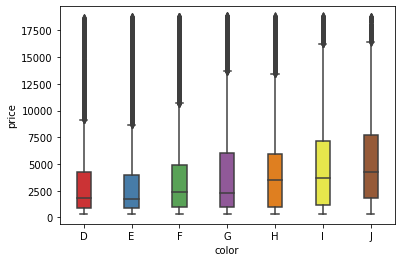

In [ ]:
sns.boxplot(y='price',data=df,x='color',palette ='Set1',width =0.3,order = ['D','E','F','G','H','I','J'] )

In [ ]:
df['cut'].unique().tolist()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

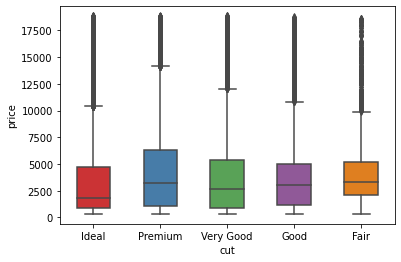

In [ ]:
sns.boxplot(y='price',data=df,x='cut',palette ='Set1', width =0.5,order =['Ideal' ,'Premium' ,'Very Good' ,'Good' ,'Fair'] )

In [ ]:
df['clarity'].unique().tolist()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

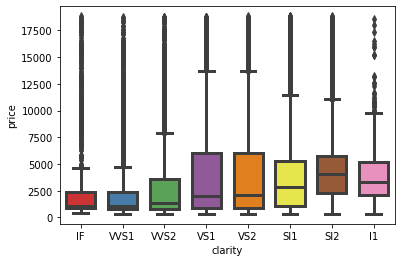

In [ ]:
sns.boxplot(y='price',data=df,x='clarity',palette ='Set1', width =0.7,linewidth=3,order =['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])

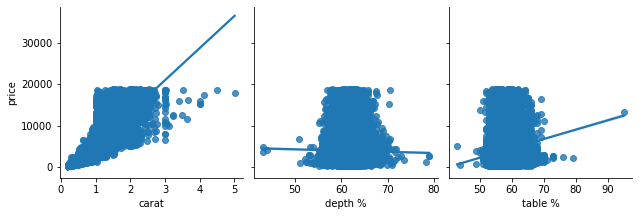

In [ ]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['carat','depth %','table %'] , y_vars =  ['price'] , kind = 'reg')

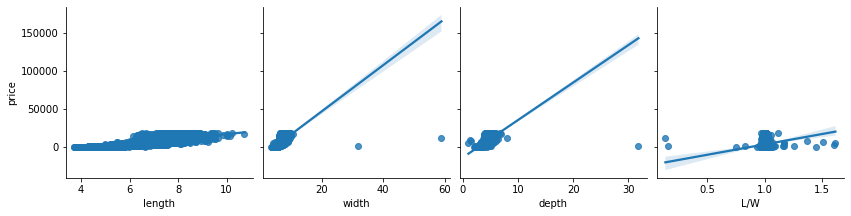

In [ ]:
g= sns.pairplot(df , height=3, aspect =1, x_vars = ['length','width','depth','L/W'] , y_vars =  ['price'] , kind = 'reg')

**Step - 3: Handle Categorical Columns i.e. convert them to numerical representation (TODO - Wisely choose between LabelEncoding and OneHotEncoding)**


In [ ]:
def CutEncoding(cut):
  value=-1
  if(cut=="Ideal"):
    value=4
  elif(cut=="Premium"):
    value=3
  elif(cut=="Good"):
    value=2
  elif(cut=="Very Good"):
    value=1
  elif(cut=="Fair"):
    value=0
  return value

print("Cut Feature Before Encoding:",*df['cut'].unique())
df['cut']=df['cut'].apply(lambda x:CutEncoding(x))
print("Cut Feature After Encoding:",*df['cut'].unique())

Cut Feature Before Encoding: Ideal Premium Good Very Good Fair
Cut Feature After Encoding: 4 3 2 1 0


In [ ]:
from sklearn.preprocessing import LabelEncoder
ColorEncoder=LabelEncoder()
print("Color Feature Before Encoding:",*df['color'].unique())
df.color=ColorEncoder.fit_transform(df.color)
print("Color Feature After Encoding:",*df['color'].unique())

Color Feature Before Encoding: E I J H F G D
Color Feature After Encoding: 1 5 6 4 2 3 0


In [ ]:
ColorEncoder=LabelEncoder()
print("Color Feature Before Encoding:",*df['clarity'].unique())
df.clarity=ColorEncoder.fit_transform(df.clarity)
print("Color Feature After Encoding:",*df['clarity'].unique())

Color Feature Before Encoding: SI2 SI1 VS1 VS2 VVS2 VVS1 I1 IF
Color Feature After Encoding: 3 2 4 5 7 6 0 1


**Step - 4: Split the data - Test and Train (recommended 75:25 split)**

In [ ]:
X = df.drop('price', axis=1)
y = df.price
X

,carat,cut,color,clarity,depth %,table %,length,width,depth,L/W
0,0.23,4,1,3,61.5,55.0,3.95,3.98,2.43,0.992462
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,1.013021
2,0.23,2,1,4,56.9,65.0,4.05,4.07,2.31,0.995086
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,0.992908
4,0.31,2,6,3,63.3,58.0,4.34,4.35,2.75,0.997701
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,4,0,2,60.8,57.0,5.75,5.76,3.50,0.998264
53936,0.72,2,0,2,63.1,55.0,5.69,5.75,3.61,0.989565
53937,0.70,1,0,2,62.8,60.0,5.66,5.68,3.56,0.996479
53938,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,1.004902


In [ ]:
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53920, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=1)

**Step - 5: Normalize the data**

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Step - 6: Build KNN Algorithm from scratch and do the predictions for test data. You should not use the sklearn KNN algorithm here. Write the complete code implementation on KNN**

In [ ]:
class KNN_Regression:
    def __init__(self,k):
        self.k=k
        
    def fit_func(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        
    def predict_func(self,X):
        X=np.asarray(X)
        predict=[]
        for x in X:
            distance=np.sqrt(np.sum((x-self.X)**2,axis=1))
            sort_value=distance.argsort()
            sort_value=sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)

In [ ]:
Model=KNN_Regression(k=3)
Model.fit_func(X_train,y_train)
y_pred_KNN=Model.predict_func(X_test)

In [ ]:
y_pred_KNN

array([  473.66666667,  1795.33333333, 11504.33333333, ...,
       12055.66666667,   652.        ,   885.33333333])

**Step - 7: Evaluate your model**

In [ ]:
from sklearn import metrics
scratch_acu=metrics.r2_score(y_test,y_pred_KNN)
scratch_acu

0.9512656653736776

**Step - 8: Train a model using sklearn KNN Algorithm and compare the results with your scratch implementation**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_test_pred = regressor.predict(X_test)
y_test_pred

array([  534.8,  1790.4, 11759.4, ..., 13149.4,   649.4,   982.2])

In [ ]:
sk_acu=metrics.r2_score(y_test,y_test_pred)
sk_acu

0.9542429942252812

**Comparing Accuracy of Both**

In [ ]:
print("Accuracy calculated using KNN without library funcion:",scratch_acu)
print("Accuracy calculated using KNN with Scikitlearn:",sk_acu)

Accuracy calculated using KNN without library funcion: 0.9512656653736776
Accuracy calculated using KNN with Scikitlearn: 0.9542429942252812
